<a href="https://colab.research.google.com/github/blazarc/bigdata/blob/master/textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("Rwordseg",repos="http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [2]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [22]:
#載入文字
content<-"嚴重特殊傳染性肺炎疫情持續在全球蔓延,已造成三千多萬人感染,死亡人數破百萬人,歐美醫療體系幾近崩潰,各種行動限制對於各國之經濟更有莫大之衝擊。
然而台灣未實行大規模封鎖行動,維持正常上班上課與各種經濟活動,至今無大規模疫情爆發,醫療體系也仍能正常提供民眾服務,顯示台灣的防疫政策正確而有效,
獲得世界各國高度肯定。國家衛生研究院群體健康科學研究所與感染症與疫苗研究所合作,利用真實數據與數學模型證實,良好的邊境管控,詳盡的疫情調查,
確實的隔離與檢疫,以及民眾遵行防疫措施,為台灣抗疫四大支柱。台灣也對世界各國提供各項協助與經驗分享,期望幫助各國盡快從疫情的陰霾中走出。"
#定義斷詞器
cutter<-worker(bylines=F)#

In [23]:
cutter[content]

[1] "嚴重"           "特殊"           "傳染性"         "肺炎"          
  [5] "疫情"           "持續"           "在"             "全球"          
  [9] "蔓延"           "已"             "造成"           "三千多萬"      
 [13] "人"             "感染"           "死亡"           "人數"          
 [17] "破"             "百萬"           "人"             "歐美"          
 [21] "醫療"           "體系"           "幾近"           "崩潰"          
 [25] "各種"           "行動"           "限制"           "對於"          
 [29] "各國"           "之"             "經濟"           "更"            
 [33] "有"             "莫大"           "之"             "衝擊"          
 [37] "然而"           "台灣"           "未"             "實行"          
 [41] "大規模"         "封鎖"           "行動"           "維持"          
 [45] "正常"           "上班"           "上課"           "與"            
 [49] "各種"           "經濟"           "活動"           "至今"          
 [53] "無"             "大規模"         "疫情"           "爆發"          
 [57] "醫療"           "體系"           "也"             "仍"            
 [61] "能"             "正常"           "提供"           "民眾"          
 [65] "服務"           "顯示"           "台灣"           "的"            
 [69] "防疫"           "政策"           "正確"           "而"            
 [73] "有效"           "獲得"           "世界"           "各國"          
 [77] "高度肯定"       "國家衛生研究院" "群體"           "健康"          
 [81] "科學"           "研究所"         "與"             "感染"          
 [85] "症"             "與"             "疫苗"           "研究所"        
 [89] "合作"           "利用"           "真實"           "數據"          
 [93] "與"             "數學模型"       "證實"           "良好"          
 [97] "的"             "邊境"           "管控"           "詳盡"          
[101] "的"             "疫情"           "調查"           "確實"          
[105] "的"             "隔離"           "與"             "檢疫"          
[109] "以及"           "民眾"           "遵行"           "防疫"          
[113] "措施"           "為"             "台灣"           "抗疫"          
[117] "四大"           "支柱"           "台灣"           "也"            
[121] "對"             "世界"           "各國"           "提供"          
[125] "各項"           "協助"           "與"             "經驗"          
[129] "分享"           "期望"           "幫助"           "各國"          
[133] "盡快"           "從"             "疫情"           "的"            
[137] "陰霾"           "中"             "走出"

In [28]:
new_words<-c("傳染性肺炎","醫療體系","防疫措施","世界各國","群體健康科學研究所","感染症與疫苗研究所")
#一次只能加入一個詞,常常需要搭配迴圈使用
for(i in 1:length(new_words)){
new_user_word(cutter,new_words[i])
}
content<-str_remove_all(content,"[0-9a-zA-Z]+?")
cutter[content]

[1] "嚴重"               "特殊"               "傳染性肺炎"        
  [4] "疫情"               "持續"               "全球"              
  [7] "蔓延"               "已"                 "造成"              
 [10] "三千多萬"           "人"                 "感染"              
 [13] "死亡"               "人數"               "破"                
 [16] "百萬"               "人"                 "歐美"              
 [19] "醫療體系"           "幾近"               "崩潰"              
 [22] "各種"               "行動"               "限制"              
 [25] "對於"               "各國"               "經濟"              
 [28] "有"                 "莫大"               "衝擊"              
 [31] "然而"               "台灣"               "實行"              
 [34] "大規模"             "封鎖"               "行動"              
 [37] "維持"               "正常"               "上班"              
 [40] "上課"               "與"                 "各種"              
 [43] "經濟"               "活動"               "至今"              
 [46] "無"                 "大規模"             "疫情"              
 [49] "爆發"               "醫療體系"           "仍"                
 [52] "能"                 "正常"               "提供"              
 [55] "民眾"               "服務"               "顯示"              
 [58] "台灣"               "的"                 "防疫"              
 [61] "政策"               "正確"               "有效"              
 [64] "獲得"               "世界各國"           "高度肯定"          
 [67] "國家衛生研究院"     "群體健康科學研究所" "與"                
 [70] "感染症與疫苗研究所" "合作"               "利用"              
 [73] "真實"               "數據"               "與"                
 [76] "數學模型"           "證實"               "良好"              
 [79] "的"                 "邊境"               "管控"              
 [82] "詳盡"               "的"                 "疫情"              
 [85] "調查"               "確實"               "的"                
 [88] "隔離"               "與"                 "檢疫"              
 [91] "以及"               "民眾"               "遵行"              
 [94] "防疫措施"           "為"                 "台灣"              
 [97] "抗疫"               "四大"               "支柱"              
[100] "台灣"               "對"                 "世界各國"          
[103] "提供"               "各項"               "協助"              
[106] "與"                 "經驗"               "分享"              
[109] "期望"               "幫助"               "各國"              
[112] "盡快"               "從"                 "疫情"              
[115] "的"                 "陰霾"               "中"                
[118] "走出"

In [29]:
writeLines(new_words,"new_words.txt")

In [33]:
stop_words<-c("在","之","更","個","未","而","也","的","與")
writeLines(stop_words, "stop_words.txt")

In [34]:

cutter <- worker(user = "new_words.txt", stop_word = "stop_words.txt",bylines = FALSE)
seg_words <- cutter[content]
seg_words

[1] "嚴重"               "特殊"               "傳染性肺炎"        
  [4] "疫情"               "持續"               "全球"              
  [7] "蔓延"               "已"                 "造成"              
 [10] "三千多萬"           "人"                 "感染"              
 [13] "死亡"               "人數"               "破"                
 [16] "百萬"               "人"                 "歐美"              
 [19] "醫療體系"           "幾近"               "崩潰"              
 [22] "各種"               "行動"               "限制"              
 [25] "對於"               "各國"               "經濟"              
 [28] "有"                 "莫大"               "衝擊"              
 [31] "然而"               "台灣"               "實行"              
 [34] "大規模"             "封鎖"               "行動"              
 [37] "維持"               "正常"               "上班"              
 [40] "上課"               "各種"               "經濟"              
 [43] "活動"               "至今"               "無"                
 [46] "大規模"             "疫情"               "爆發"              
 [49] "醫療體系"           "仍"                 "能"                
 [52] "正常"               "提供"               "民眾"              
 [55] "服務"               "顯示"               "台灣"              
 [58] "防疫"               "政策"               "正確"              
 [61] "有效"               "獲得"               "世界各國"          
 [64] "高度肯定"           "國家衛生研究院"     "群體健康科學研究所"
 [67] "感染症與疫苗研究所" "合作"               "利用"              
 [70] "真實"               "數據"               "數學模型"          
 [73] "證實"               "良好"               "邊境"              
 [76] "管控"               "詳盡"               "疫情"              
 [79] "調查"               "確實"               "隔離"              
 [82] "檢疫"               "以及"               "民眾"              
 [85] "遵行"               "防疫措施"           "為"                
 [88] "台灣"               "抗疫"               "四大"              
 [91] "支柱"               "台灣"               "對"                
 [94] "世界各國"           "提供"               "各項"              
 [97] "協助"               "經驗"               "分享"              
[100] "期望"               "幫助"               "各國"              
[103] "盡快"               "從"                 "疫情"              
[106] "陰霾"               "中"                 "走出"

In [35]:
# 計算詞彙頻率
txt_freq <- freq(seg_words)
#由大到小排列
txt_freq <- arrange(txt_freq, desc(freq))
# 檢查前5名
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,疫情,4
2,台灣,4
3,各國,2
4,行動,2
5,各種,2
6,經濟,2


In [44]:
install.packages("showtext")
library(showtext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



In [45]:
showtext.auto(enable = TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



In [48]:
par(family=("Microsoft YaHei"))#wordcloud需要定義字體,不然會無法顯示中文

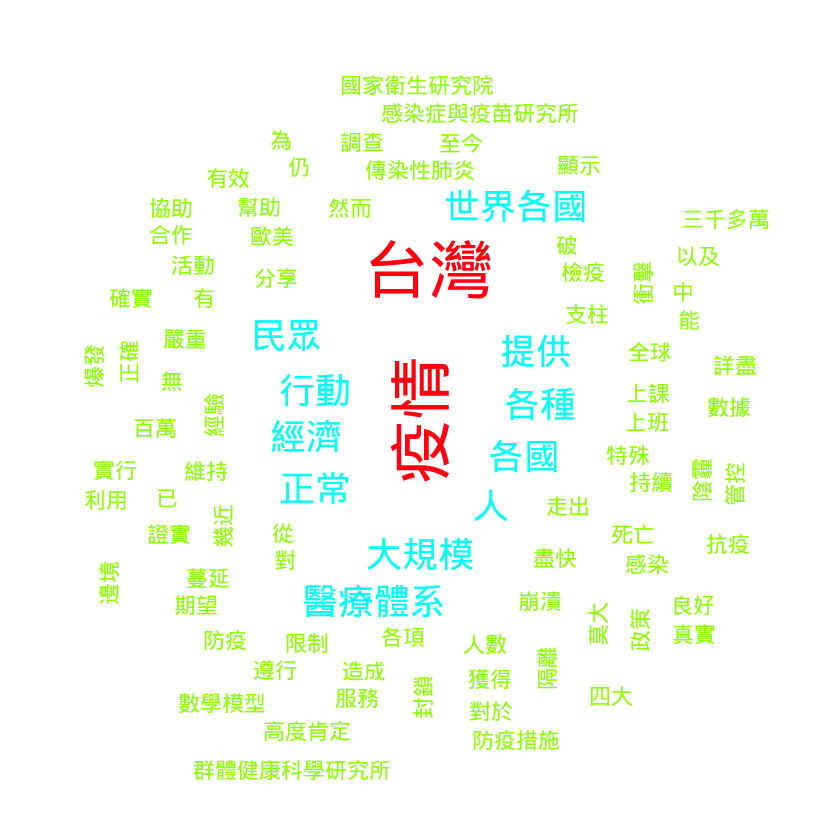

In [49]:
#文字雲(pkg:wordcloud)
wordcloud(txt_freq$char,txt_freq$freq,min.freq=1,random.order=F,ordered.colors=F,colors=rainbow(nrow(txt_freq)))